In [1]:
!export PYTHONPATH=""
!echo $PYTHONPATH

In [2]:
import habitat

import sys
sys.path.insert(0, '/private/home/bhavanajain/habitat-notebooks/habitat-sim')
sys.path.insert(0, '/private/home/bhavanajain/habitat-notebooks/habitat-sim/build/esp/bindings')

import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt

# Scene semantic annotations

In [3]:
def print_scene_recur(scene):
    for level in scene.levels:
        print(
            f"Level id:{level.id}, center:{level.aabb.center},"
            f" dims:{level.aabb.sizes}"
        )
        for region in level.regions:
            print(
                f"Region id:{region.id}, category:{region.category.name()},"
                f" center:{region.aabb.center}, dims:{region.aabb.sizes}"
            )
            for obj in region.objects:
                print(
                    f"Object id:{obj.id}, category:{obj.category.name()},"
                    f" center:{obj.aabb.center}, dims:{obj.aabb.sizes}"
                )

In [4]:
"""
Habitat-API
All the boilerplate code in the habitat-sim to set sensor config and agent config is abstracted out in the Habitat-API config system.
Default config is at habitat/config/default.py. You can override defaults in a separate file and pass it to the get_config function.
"""

config = habitat.get_config(config_file="tasks/pointnav_mp3d.yaml", config_dir='/private/home/bhavanajain/habitat-notebooks/habitat-api/configs/')

env = habitat.Env(config=config)

env.episodes = random.sample(env.episodes, 5)

# Print semantic annotations for first episode, print aggregated stats for the rest
for i in range(len(env.episodes)):
    scene = env.sim.semantic_annotations()
    print("Scene %s has %s levels, %s regions and %s objects" % (env.sim.config.SCENE.split("/")[-2], len(scene.levels), len(scene.regions), len(scene.objects)))
    env.reset()
    
env.close()   
# Important to close env, as only one OpenGL context is allowed 
# and the current one needs to be closed before another one can be instantiated.

2019-04-22 22:43:16,637 initializing sim Sim-v0
2019-04-22 22:43:24,387 initializing task Nav-v0


Scene 2azQ1b91cZZ has 2 levels, 29 regions and 863 objects
Scene TbHJrupSAjP has 3 levels, 28 regions and 642 objects
Scene Z6MFQCViBuw has 2 levels, 22 regions and 563 objects
Scene X7HyMhZNoso has 2 levels, 30 regions and 537 objects
Scene TbHJrupSAjP has 3 levels, 28 regions and 642 objects


# Take random actions and display sensor data

In [5]:
from PIL import Image
from habitat_sim.utils import d3_40_colors_rgb
import numpy as np

# display utils
def display_sample(rgb_obs, semantic_obs, depth_obs):
    plt.figure()
    
    rgb_img = Image.fromarray(rgb_obs, mode="RGB")
    
    semantic_img = Image.new("P", (semantic_obs.shape[1], semantic_obs.shape[0]))
    semantic_img.putpalette(d3_40_colors_rgb.flatten())
    semantic_img.putdata((semantic_obs.flatten() % 40).astype(np.uint8))
    semantic_img = semantic_img.convert("RGBA")
    
    depth_img = Image.fromarray((depth_obs / 10 * 255).astype(np.uint8), mode="L")

    arr = [rgb_img, semantic_img, depth_img]
    
    
    titles = ['rgb', 'semantic', 'depth']
    plt.figure(figsize=(12 ,8))
    for i, data in enumerate(arr):
        ax = plt.subplot(1, 3, i+1)
        ax.axis('off')
        ax.set_title(titles[i])
        plt.imshow(data)
    plt.show()

2019-04-22 22:43:47,749 initializing sim Sim-v0
2019-04-22 22:43:53,946 initializing task Nav-v0


<Figure size 432x288 with 0 Axes>

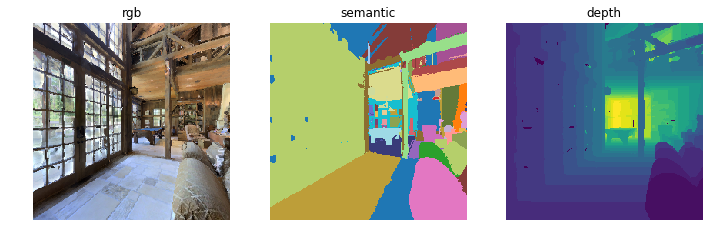

turn right


<Figure size 432x288 with 0 Axes>

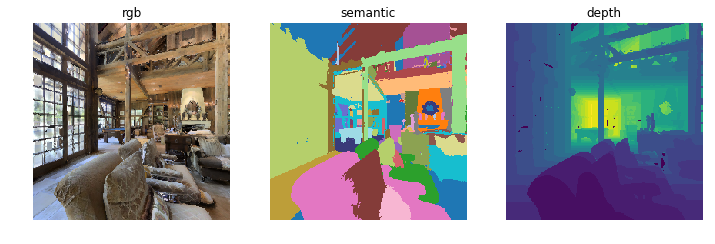

stop


<Figure size 432x288 with 0 Axes>

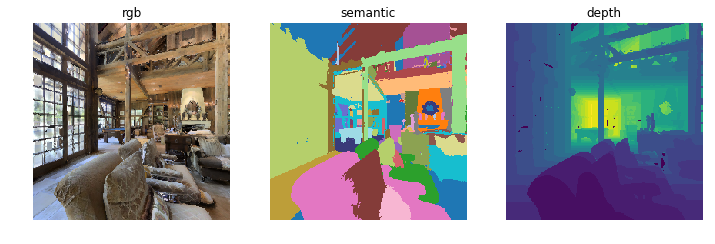

<Figure size 432x288 with 0 Axes>

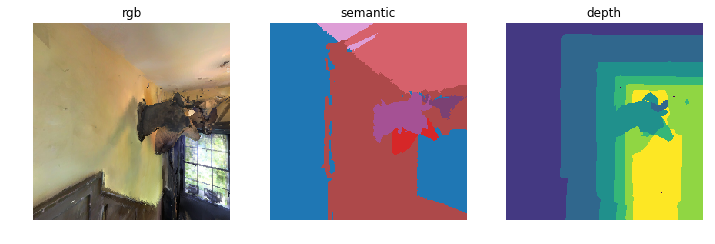

move forward


<Figure size 432x288 with 0 Axes>

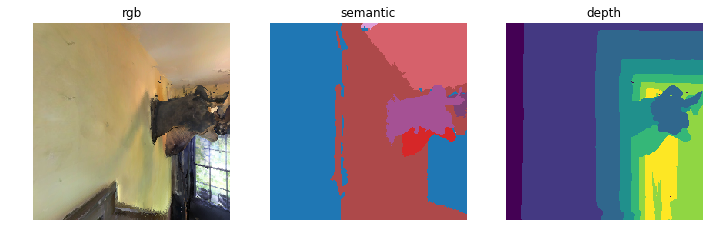

turn left


<Figure size 432x288 with 0 Axes>

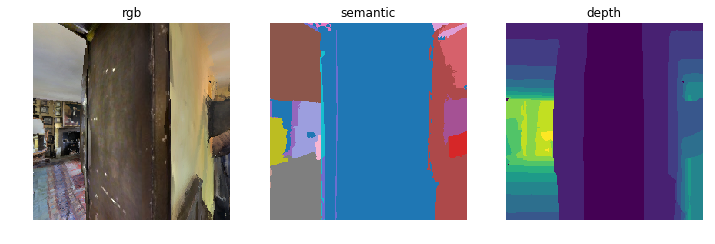

turn right


<Figure size 432x288 with 0 Axes>

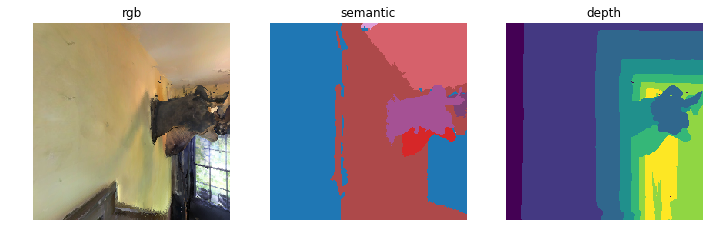

turn right


<Figure size 432x288 with 0 Axes>

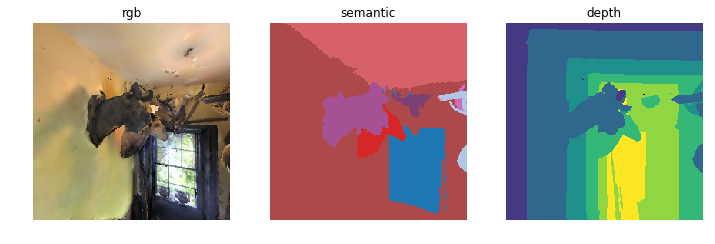

In [6]:
config = habitat.get_config(config_file="tasks/pointnav_mp3d.yaml", config_dir='/private/home/bhavanajain/habitat-notebooks/habitat-api/configs/')
env = habitat.Env(config=config)

max_steps = 4

action_mapping = {
    0: 'move forward',
    1: 'turn left',
    2: 'turn right',
    3: 'stop'
}

env.episodes = random.sample(env.episodes, 2)

for i in range(len(env.episodes)):
    observations = env.reset()
    
    display_sample(observations['rgb'], observations['semantic'], np.squeeze(observations['depth']))
    
    count_steps = 0
    while count_steps < max_steps:
        action = random.choice(list(action_mapping.keys()))
        print(action_mapping[action])
        observations = env.step(action)
        display_sample(observations['rgb'], observations['semantic'], np.squeeze(observations['depth']))

        count_steps += 1
        if env.episode_over:
            break
        
env.close()